# Create Labels for the Audio Sequences
The audio file contents are as follows:

** Washing Machine **
``` 
File :161225-000
Beep Sequence Count: 0

File :161225-001
Beep Sequence Count: 1
Start Sample: 9541250
End Sample:  9596500

File :161225-002
Beep Sequence Count: 1
Start Sample: 713600
End Sample:  721360

File :161225-003
Beep Sequence Count: 1
Start Sample: 813800
End Sample:  869300

File :161225-004
Beep Sequence Count: 1
Start Sample: 808700
End Sample:  864000

File :161225-005
Beep Sequence Count: 1
Start Sample: 686400
End Sample:  742000
```
** Dryer **
```
File :161225-006
Beep Sequence Count: 2
Start Sample: 1156480
End Sample:  1212300
Start Sample: 2110750
End Sample:  2118300
```

Based on this data we will create the label vector for each mel spectrogram row. 

**Note:** we need to take into account the sliding 4 second windows with a stride of 10ms.

In [1]:
%matplotlib inline
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import os

mel_directory = r'/Volumes/ThorsHammer/Data Science/data/audio-recognition/mel/'
stride = 0.01
sample_length = 4 #seconds
sample_rate = 16000

### We expect the postive class to be present at the specified sample start location

In [2]:
def calc_mel_observation_index(raw_sample_number):
    observation_index = int(raw_sample_number / (sample_rate * stride))
    return observation_index

### Visually Validate Start Sample of Positive Class

Loading file: /Volumes/ThorsHammer/Data Science/data/audio-recognition/mel/161225-001.wav-mel.csv
Data length: 60532
Loaded. Processing mel at index: 59632


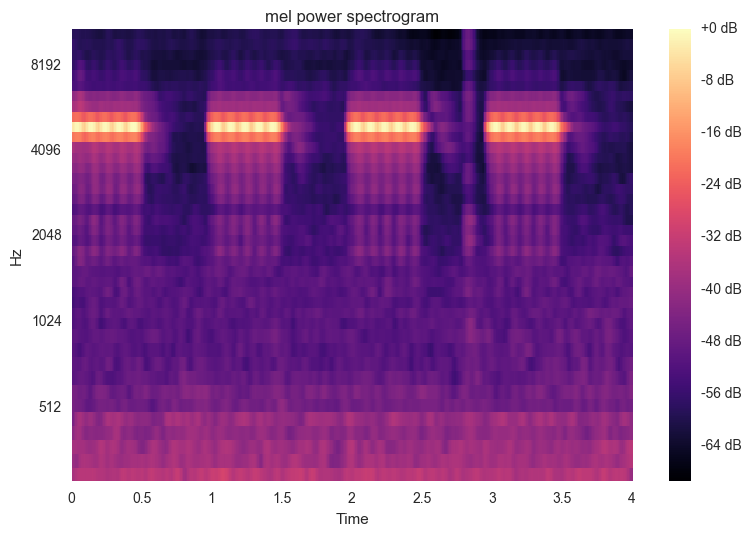

Loading file: /Volumes/ThorsHammer/Data Science/data/audio-recognition/mel/161225-002.wav-mel.csv
Data length: 4742
Loaded. Processing mel at index: 4460


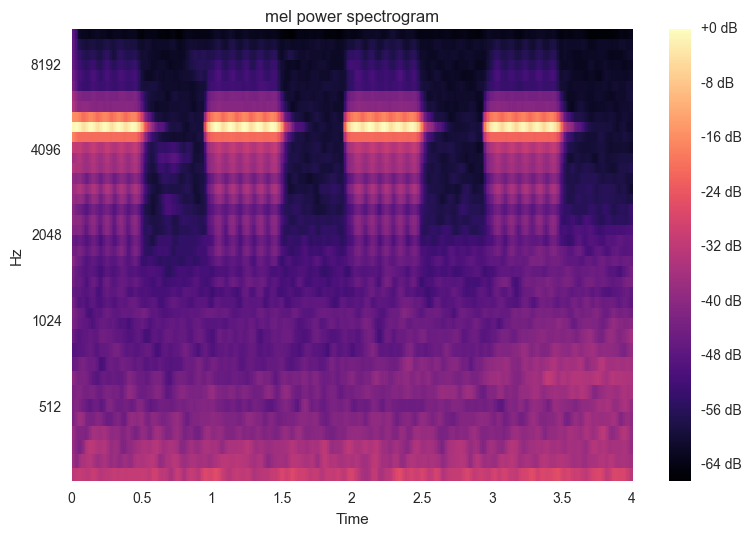

Loading file: /Volumes/ThorsHammer/Data Science/data/audio-recognition/mel/161225-003.wav-mel.csv
Data length: 5456
Loaded. Processing mel at index: 5086


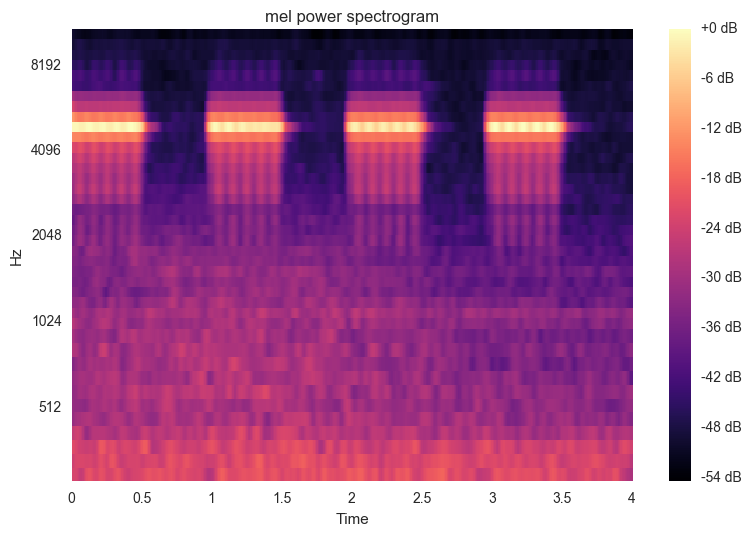

Loading file: /Volumes/ThorsHammer/Data Science/data/audio-recognition/mel/161225-004.wav-mel.csv
Data length: 5419
Loaded. Processing mel at index: 5054


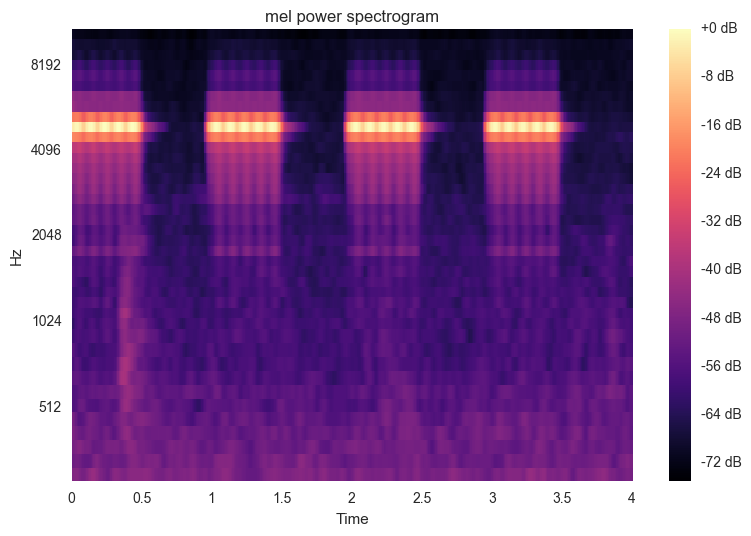

Loading file: /Volumes/ThorsHammer/Data Science/data/audio-recognition/mel/161225-005.wav-mel.csv
Data length: 4684
Loaded. Processing mel at index: 4290


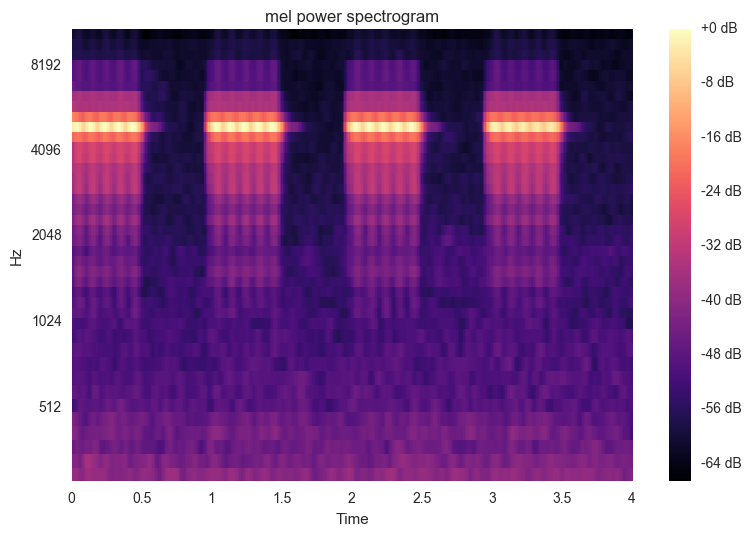

In [3]:
# Test file
import csv
import librosa
import librosa.display

def plot_mel(data, hop_length):
    librosa.display.specshow(data, x_axis='time', sr=sample_rate, y_axis='mel', hop_length=hop_length)

    # Put a descriptive title on the plot
    plt.title('mel power spectrogram')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()
    plt.show()
    
def load_data(filename):
    raw_csv = []
    with open (filename, 'rb') as f:
        reader = csv.reader(f, delimiter=' ',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for row in reader:
            raw_csv.append(row)
    return raw_csv
        
positive_classes = {
    '161225-001' : 9541250,
    '161225-002' : 713600,
    '161225-003' : 813800,
    '161225-004' : 808700,
    '161225-005' : 686400
}

file_sufix = '.wav-mel.csv'

for key in sorted(positive_classes.keys()):
    filename = os.path.join(mel_directory,key+file_sufix)
    print('Loading file: %s'%filename)

    raw_csv = load_data(filename)
    print('Data length: %i'%len(raw_csv))
    mel_index = calc_mel_observation_index(positive_classes[key])
    print('Loaded. Processing mel at index: %i'%mel_index)
    plot_mel(\
         np.asarray(raw_csv[mel_index])\
         .astype('float32')\
         .reshape((40,401))\
         ,int(sample_rate * stride)\
        )